
# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

# Data Analysing


In [95]:
df=pd.read_csv(r"C:\Users\maz\Desktop\fazna study\project_4_health\data.csv")

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [38]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
231,B,11.320,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,0.1869,...,12.08,33.75,79.82,452.3,0.09203,0.14320,0.10890,0.02083,0.2849,0.07087
298,B,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.013740,0.1635,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
45,M,18.650,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.100900,0.1907,...,22.82,21.32,150.60,1567.0,0.16790,0.50900,0.73450,0.23780,0.3799,0.09185
202,M,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.162000,0.2200,...,25.12,32.68,177.00,1986.0,0.15360,0.41670,0.78920,0.27330,0.3198,0.08762
234,B,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.016670,0.1551,...,10.51,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178


In [30]:
df.shape

(569, 31)

In [ ]:
#cleaning the data 
#finding the count of diagnosis

In [ ]:
df.diagnosis.unique()

In [36]:
df.groupby(['diagnosis']).agg('count')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [8]:
#missing value percentage
miss_percentage=df.isna().sum()*100/df.shape[0]
miss_percentage.sort_values()

id                           0.0
symmetry_worst               0.0
concave points_worst         0.0
concavity_worst              0.0
compactness_worst            0.0
smoothness_worst             0.0
area_worst                   0.0
perimeter_worst              0.0
texture_worst                0.0
radius_worst                 0.0
fractal_dimension_se         0.0
symmetry_se                  0.0
concave points_se            0.0
concavity_se                 0.0
compactness_se               0.0
fractal_dimension_worst      0.0
smoothness_se                0.0
perimeter_se                 0.0
texture_se                   0.0
radius_se                    0.0
fractal_dimension_mean       0.0
symmetry_mean                0.0
concave points_mean          0.0
concavity_mean               0.0
compactness_mean             0.0
smoothness_mean              0.0
area_mean                    0.0
perimeter_mean               0.0
texture_mean                 0.0
radius_mean                  0.0
diagnosis 

In [9]:
miss_percentage[miss_percentage>20]

Unnamed: 32    100.0
dtype: float64

In [10]:
drop_col_list=list(miss_percentage[miss_percentage>20].index)
df.drop(drop_col_list, axis=1,inplace=True)

In [11]:
#droping the missing value and id
df.drop(["id"],axis=1,inplace=True)

In [12]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
X=df.drop(['diagnosis'],axis=1)
y=df.diagnosis

In [ ]:
The analysis is a supervised problem
the prediction is done by different classification methods.

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=df.shape[0], n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [96]:
y_pred=clf.predict(X)

ValueError: X has 31 features, but DecisionTreeClassifier is expecting 4 features as input.

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=['M','B']))

              precision    recall  f1-score   support

           M       0.87      0.82      0.84       282
           B       0.83      0.88      0.85       287

    accuracy                           0.85       569
   macro avg       0.85      0.85      0.85       569
weighted avg       0.85      0.85      0.85       569



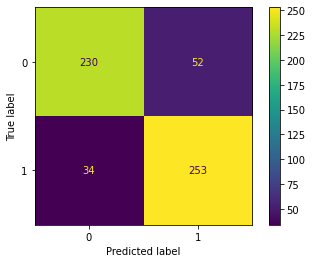

In [62]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X, y)

In [63]:
y.shape

(569,)

In [64]:
len(y)

569

In [67]:
df['y_pred']=y_pred

In [68]:
df.to_csv("breast_cancer_pred.csv")

In [73]:
import os
os.getcwd()

'C:\\Users\\maz'

# Gradient Boosted Tree Classifier

In [83]:
X=df.drop(['diagnosis'],axis=1)
y=df.diagnosis

In [86]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

#gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=1, random_state=0).fit(X, y)


In [91]:
y_pred=gbc.predict(X)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=['M','B']))

              precision    recall  f1-score   support

           M       0.99      0.99      0.99       357
           B       0.98      0.98      0.98       212

    accuracy                           0.99       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.99      0.99      0.99       569



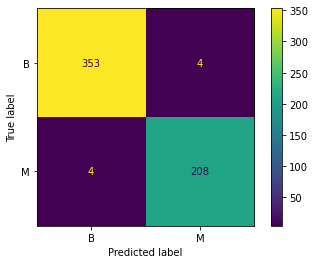

In [94]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbc,X, y)